# Trend Lines in PyPlot

Drawing a Trend Line requires that we compute a polynomial fitting for the time series. This is easily handled by the libraries in PyPlot. For this exercise, we're going to examine data taken from [google trends](www.trends.google.com). 

First, let's get our data loaded in and do some re-organizing. It's important to note that for this step, it's best if the data is **evenly spaced**, and retains an **incremental integer index**. Luckily, our data follows those guidelines, but if it didn't, at this point you should be able to use Pandas to resample and reindex.

In [16]:
import pandas as pd
from datetime import timedelta
%pylab inline

# Import the data
df = pd.read_csv('../../assets/datasets/mapquest_google_trends.csv')

# Clean/Organize the data. NOTE: FOR TREND LINE, MAKE SURE THE SAMPLING IS EVENLY SPACED, AND RETAIN AN INCREMENTAL INTEGER INDEX.
df.columns = ['WeekOf', 'Hits']

Populating the interactive namespace from numpy and matplotlib


Great! Now, let's plot the data.

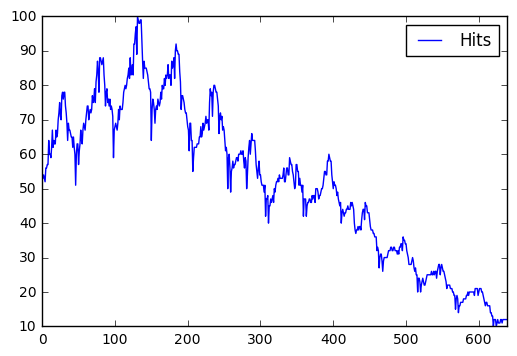

In [17]:
df.plot()

Next we need to compute a line coefficient. This is where NumPy's `polyfit` method comes in handy. Let's look at the documentation [here](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html) and implement it.

In [18]:
line_coef = np.polyfit(df.index,df.Hits,3)

Last step is to define the polynomial function using the line coefficiant. We can do this on a single dimension using NumPy's `poly1d` method.

In [19]:
polynomial = np.poly1d(line_coef)

In [20]:
line_coef

array([  8.75948930e-07,  -1.02456183e-03,   2.24211880e-01,
         6.26480849e+01])

Ok, let's plot it!

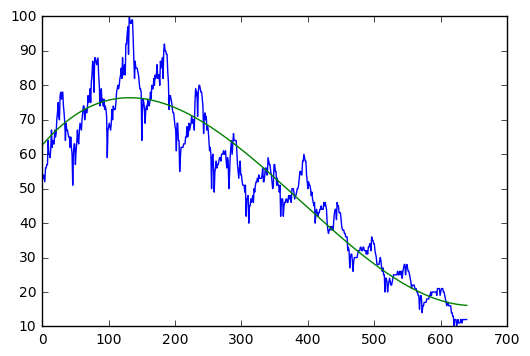

In [21]:
pyplot.plot(df.index, df.Hits, df.index, polynomial(df.index))

## Great job!

how to include dates in trendline plots

In [23]:
df = pd.read_csv('../../assets/datasets/mdr.csv')

In [24]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12-Dec-16,8.15,8.21,7.85,7.92,4090869
1,9-Dec-16,7.81,7.94,7.75,7.93,3592339
2,8-Dec-16,7.52,7.73,7.47,7.72,4630818
3,7-Dec-16,7.20,7.60,7.14,7.47,4431592
4,6-Dec-16,7.06,7.21,6.98,7.20,3543751


In [25]:
df.Date = pd.to_datetime(df.Date)

In [26]:
df.Date.dtype

dtype('<M8[ns]')

In [38]:
df=df.set_index("Date")

In [40]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-12,8.15,8.21,7.85,7.92,4090869
2016-12-09,7.81,7.94,7.75,7.93,3592339
2016-12-08,7.52,7.73,7.47,7.72,4630818
2016-12-07,7.20,7.60,7.14,7.47,4431592
2016-12-06,7.06,7.21,6.98,7.20,3543751


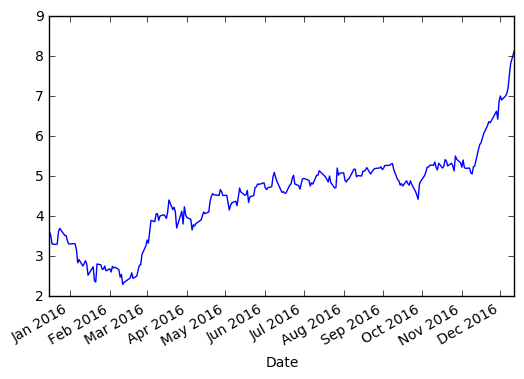

In [42]:
df.Open.plot()

In [44]:
line_coef = np.polyfit(range(len(df.index)), df.Open, 3)

In [45]:
polynomial = np.poly1d(line_coef)

In [47]:
#evaluate the polynomial at x=1
polynomial(1)

6.4342122960556214

In [48]:
df["trendline"] = polynomial(range(len(df.index)))

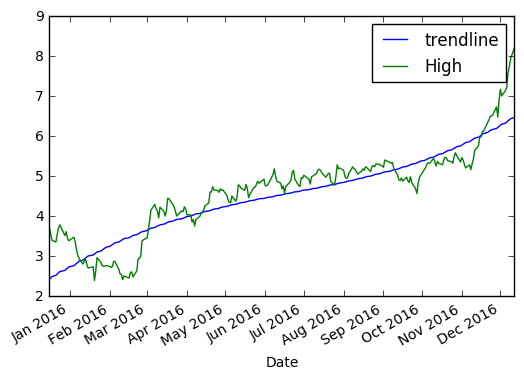

In [50]:
df.plot(y=["trendline", "High"])